# Titanic

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
file1 = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Titanic/titanic_data.csv')

In [347]:
file1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [348]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [349]:
file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Numerical Analysis

In [350]:
file1.select_dtypes(include = ['number']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

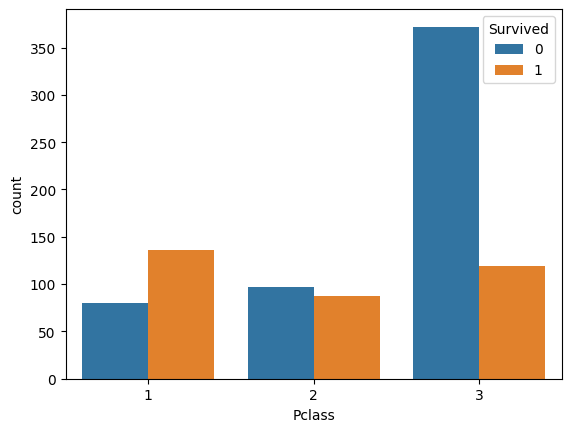

In [351]:
sns.countplot(x = 'Pclass', data = file1, hue = 'Survived')
plt.show()

In [352]:
file1.groupby('Survived')['Pclass'].value_counts(normalize=True)

Survived  Pclass
0         3         0.677596
          2         0.176685
          1         0.145719
1         1         0.397661
          3         0.347953
          2         0.254386
Name: proportion, dtype: float64

In [353]:
file1.groupby('Survived')['SibSp'].value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: count, dtype: int64

In [354]:
file1['isChildren'] = np.where(file1['Age'] < 15, 1, 0)

In [355]:
file1['isChildren']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: isChildren, Length: 891, dtype: int64

In [356]:
file1['isChildren'].value_counts()

isChildren
0    813
1     78
Name: count, dtype: int64

In [357]:
file1.groupby('isChildren')['Survived'].value_counts()

isChildren  Survived
0           0           516
            1           297
1           1            45
            0            33
Name: count, dtype: int64

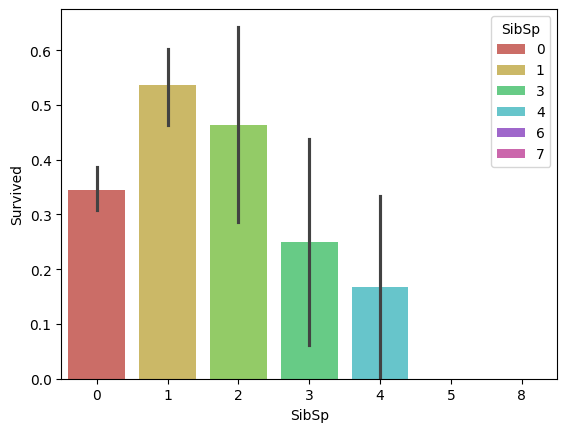

In [358]:
sns.barplot(x = 'SibSp', y = 'Survived', data = file1, estimator='mean', hue = 'SibSp', palette='hls')
plt.show()

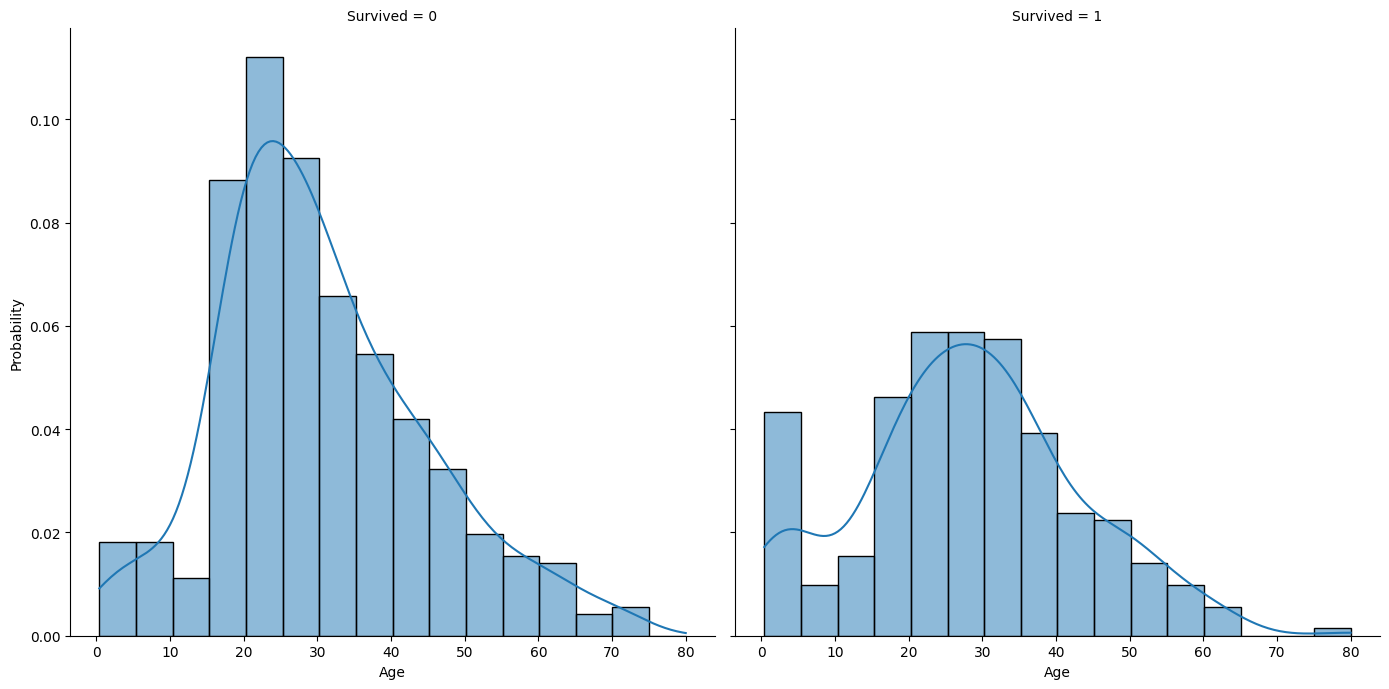

In [359]:
sns.displot(x = 'Age', data = file1, kde = True, stat = 'probability', col = 'Survived', height=7, bins = 16)
plt.show()

In [360]:
file1['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
30.00    25
19.00    25
         ..
66.00     1
0.92      1
23.50     1
53.00     1
80.00     1
Name: count, Length: 88, dtype: int64

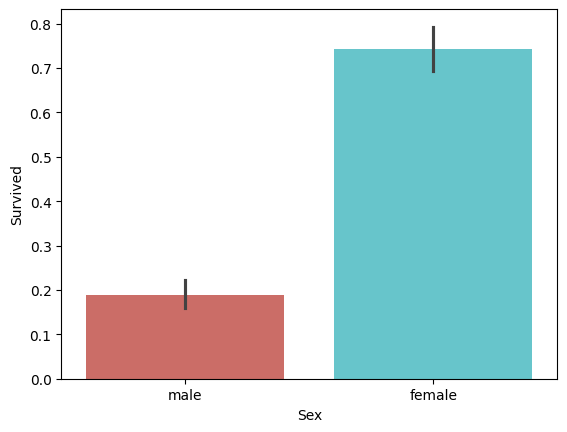

In [361]:
sns.barplot(x = 'Sex', y = 'Survived', data = file1, hue = 'Sex', palette='hls')
plt.show()

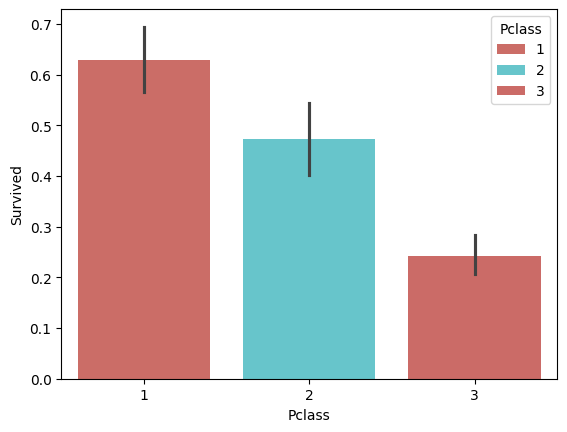

In [362]:
sns.barplot(x = 'Pclass', y = 'Survived', data = file1, hue = 'Pclass', palette='hls')
plt.show()

## Data Filling

In [363]:
ageMean = file1['Age'].mean()
ageStd = file1['Age'].std()
lowRange = ageMean - ageStd
highRange = ageMean + ageStd

In [364]:
randomValues = np.random.randint(low = lowRange, high = highRange, size = file1['Age'].isna().sum())

In [365]:
randomValues = list(randomValues)

In [366]:
a = file1['Age'].copy()

In [367]:
a[a.isna()] = randomValues

In [368]:
a

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [369]:
a.isna().sum()

0

In [370]:
file1['Age'] =a

In [371]:
file1['Age'].isna().sum()

0

In [372]:
file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
isChildren       0
dtype: int64

In [373]:
file1.drop('Cabin', axis = 1, inplace = True)

In [374]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  isChildren   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [375]:
file1.fillna({'Embarked' : 'S'}, inplace=True)

In [376]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  isChildren   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [377]:
file1.drop(['PassengerId', 'Name', 'Ticket'], axis =1 , inplace = True)

In [378]:
X = file1.drop('Survived', axis = 1)
y = file1['Survived']

In [379]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isChildren
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,0
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,0
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,0
888,3,female,25.0,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,0


In [380]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

In [381]:
categorical_data = file1.select_dtypes(include = ['object'])

for i in categorical_data.columns:
    X[i] = le.fit_transform(file1[i])

In [382]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isChildren
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,2,0
3,1,0,35.0,1,0,53.1000,2,0
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,0
888,3,0,25.0,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,0


In [383]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

## Importing Classifier Modules

In [384]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [385]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [386]:
lr = LogisticRegression()
gaussian = GaussianNB()
knn = KNeighborsClassifier(5)
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=1000)

In [387]:
lr.fit(X_train, y_train)
gaussian.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [388]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


# Obtain predictions for each classifier
predicted_lr = lr.predict(X_test)
predicted_gaussian = gaussian.predict(X_test)
predicted_knn = knn.predict(X_test)
predicted_svc = svc.predict(X_test)
predicted_tree = tree.predict(X_test)
predicted_forest = forest.predict(X_test)

# Accuracy
print('-'*150)
print('Accuracy'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(accuracy_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(accuracy_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(accuracy_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(accuracy_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(accuracy_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(accuracy_score(y_test, predicted_forest)))

# Precision
print('-'*150)
print('Precision'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(precision_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(precision_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(precision_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(precision_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(precision_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(precision_score(y_test, predicted_forest)))

# Recall
print('-'*150)
print('Recall'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(recall_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(recall_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(recall_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(recall_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(recall_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(recall_score(y_test, predicted_forest)))

# F1 Score
print('-'*150)
print('F1 Score'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(f1_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(f1_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(f1_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(f1_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(f1_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(f1_score(y_test, predicted_forest)))

# ROC AUC Score (Only applicable for binary classification)
print('-'*150)
print('ROC AUC Score'.center(150))
print('-'*150)

print("Linear Regression      : {:.4f}".format(roc_auc_score(y_test, predicted_lr)))
print("Gaussian Naive Bayes   : {:.4f}".format(roc_auc_score(y_test, predicted_gaussian)))
print("K-Nearest Neighbors    : {:.4f}".format(roc_auc_score(y_test, predicted_knn)))
print("Support Vector Machine : {:.4f}".format(roc_auc_score(y_test, predicted_svc)))
print("Decision Tree          : {:.4f}".format(roc_auc_score(y_test, predicted_tree)))
print("Random Forest          : {:.4f}".format(roc_auc_score(y_test, predicted_forest)))

# Confusion Matrix
print('-'*150)
print('Confusion Matrix'.center(150))
print('-'*150)

print("Linear Regression :\n", confusion_matrix(y_test, predicted_lr))
print("Gaussian Naive Bayes :\n", confusion_matrix(y_test, predicted_gaussian))
print("K-Nearest Neighbors :\n", confusion_matrix(y_test, predicted_knn))
print("Support Vector Machine :\n", confusion_matrix(y_test, predicted_svc))
print("Decision Tree :\n", confusion_matrix(y_test, predicted_tree))
print("Random Forest :\n", confusion_matrix(y_test, predicted_forest))


------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                       Accuracy                                                                       
------------------------------------------------------------------------------------------------------------------------------------------------------
Linear Regression      : 0.8321
Gaussian Naive Bayes   : 0.8321
K-Nearest Neighbors    : 0.8284
Support Vector Machine : 0.8433
Decision Tree          : 0.7463
Random Forest          : 0.8284
------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                      Precision                                                                       
-----------------------------------------------------